### Importing the packages

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')

#### Reading the datasets

In [5]:
data = pd.read_csv(r"D:\Data Mining\archive\Obesity prediction.csv")

### Reading the colums of the data

In [7]:
data.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history', 'FAVC', 'FCVC',
       'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS',
       'Obesity'],
      dtype='object')

In [17]:
data.info()
data.describe()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2101 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,NaN,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [19]:
data.isna().sum()

Gender             0
Age               10
Height             0
Weight             0
family_history     0
FAVC               0
FCVC               0
NCP                0
CAEC               0
SMOKE              0
CH2O               0
SCC                0
FAF                0
TUE                0
CALC               0
MTRANS             0
Obesity            0
dtype: int64

### Filling the missing value

In [22]:
age = data['Age'].mode()[0]
data['Age'].fillna(age, inplace=True)

In [24]:
data.info()
data.describe()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,18.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


### Checking for duplicate data

In [27]:
data.duplicated().sum()

24

### Removing the duplicate rows

In [29]:
df = data.copy()
df.drop_duplicates(inplace=True)

In [122]:
f"Duplicated rows: {df.duplicated().sum()}"

'Duplicated rows: 0'

### Changing the data type for column

In [37]:
dtype = {
    'Gender': 'category', 
 'Age':'float64',
 'Height':'float64',
 'Weight' : 'float64',
'family_history' : 'category', 
 'FAVC' : 'category' ,
 'FCVC' : 'int64',
 'NCP' : 'int64',
 'CAEC' : 'category' ,
 'SMOKE' : 'category' ,
 'CH2O' : 'float64',
 'SCC' : 'object' ,
 'FAF' : 'float64',
 'TUE' : 'float64',
 'CALC' : 'category', 
 'MTRANS' : 'category', 
 'Obesity' : 'category' 
}

In [39]:
data_clean = data.astype(dtype)
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Gender          2111 non-null   category
 1   Age             2111 non-null   float64 
 2   Height          2111 non-null   float64 
 3   Weight          2111 non-null   float64 
 4   family_history  2111 non-null   category
 5   FAVC            2111 non-null   category
 6   FCVC            2111 non-null   int64   
 7   NCP             2111 non-null   int64   
 8   CAEC            2111 non-null   category
 9   SMOKE           2111 non-null   category
 10  CH2O            2111 non-null   float64 
 11  SCC             2111 non-null   object  
 12  FAF             2111 non-null   float64 
 13  TUE             2111 non-null   float64 
 14  CALC            2111 non-null   category
 15  MTRANS          2111 non-null   category
 16  Obesity         2111 non-null   category
dtypes: category(8)

### Finding out the outliers

In [42]:
def find_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR

    condition = (df[col] < lower_bound) | (df[col] > upper_bound)
    outliers = df[condition]
    
    return outliers

In [46]:
age_outliers = find_outliers(data_clean, 'Age')
age_outliers

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
13,Male,41.000000,1.800000,99.000000,no,yes,2,3,Sometimes,no,2.000000,no,2.000000,1.00000,Frequently,Automobile,Obesity_Type_I
21,Female,52.000000,1.690000,87.000000,yes,yes,3,1,Sometimes,yes,2.000000,no,0.000000,0.00000,no,Automobile,Obesity_Type_I
33,Male,39.000000,1.790000,90.000000,no,no,2,1,Sometimes,no,2.000000,no,0.000000,0.00000,Sometimes,Public_Transportation,Overweight_Level_II
92,Male,55.000000,1.780000,84.000000,yes,no,3,4,Frequently,no,3.000000,yes,3.000000,0.00000,Frequently,Walking,Overweight_Level_I
104,Female,38.000000,1.560000,80.000000,yes,yes,2,3,Sometimes,no,2.000000,no,0.000000,0.00000,Sometimes,Automobile,Obesity_Type_I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1740,Male,37.765356,1.763582,117.861590,yes,yes,2,2,Sometimes,no,2.038128,no,0.852344,0.00000,Sometimes,Automobile,Obesity_Type_II
1775,Male,37.207082,1.762921,118.401740,yes,yes,2,2,Sometimes,no,1.885926,no,0.615298,0.00000,Sometimes,Automobile,Obesity_Type_II
1776,Male,38.108940,1.752863,119.201465,yes,yes,2,2,Sometimes,no,1.959777,no,0.608100,0.64676,Sometimes,Automobile,Obesity_Type_II
1777,Male,38.644441,1.768235,117.792268,yes,yes,2,2,Sometimes,no,1.831187,no,0.756277,0.00000,Sometimes,Automobile,Obesity_Type_II


### Data Visualization

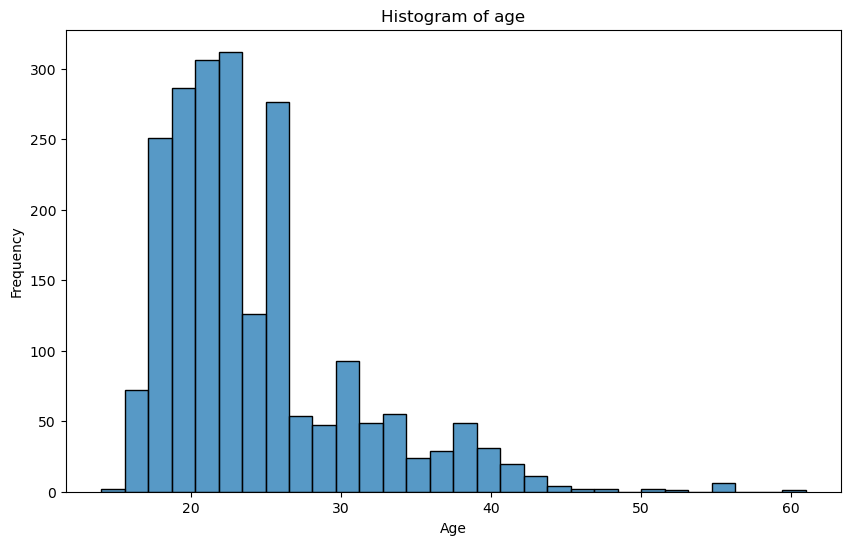

In [65]:
# Histogram of Age
plt.figure(figsize=(10, 6))
sns.histplot(data_clean['Age'], bins=30)
plt.title('Histogram of age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

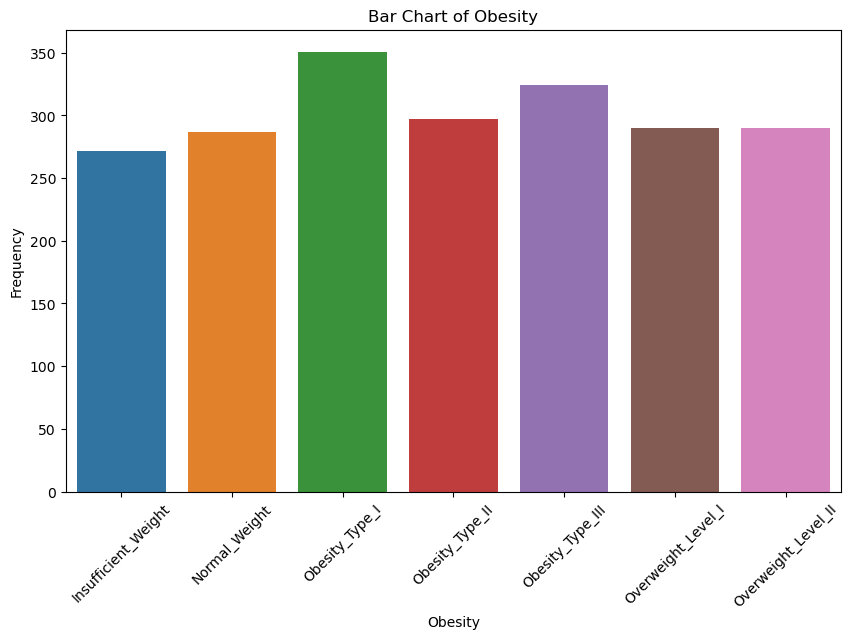

In [69]:
# Bar plot for 
plt.figure(figsize=(10, 6))
sns.countplot(x=data_clean['Obesity'])
plt.title('Bar Chart of Obesity')
plt.xlabel('Obesity')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

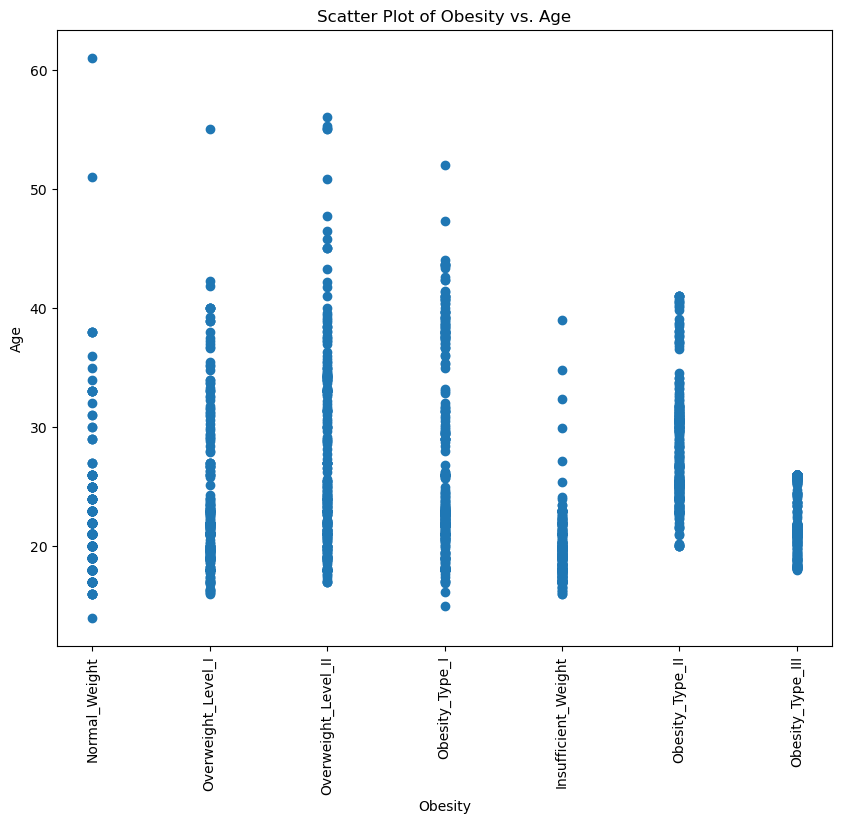

In [79]:
# Scatter plot of: Average Daily Rate vs. Booking Changes (not related)
plt.figure(figsize=(10, 8))
plt.scatter(x=data['Obesity'], y=data['Age'])
plt.title('Scatter Plot of Obesity vs. Age')
plt.xlabel('Obesity')
plt.ylabel('Age')
plt.xticks(rotation=90)
plt.show()

### Analyzing Categorical column

In [82]:
categorical_cols = data_clean.describe(include='category').columns

In [84]:
# Summary Statistics of Categorical columns
data_clean.describe(include='category')

,Gender,family_history,FAVC,CAEC,SMOKE,CALC,MTRANS,Obesity
count,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,2,2,4,2,4,5,7
top,Male,yes,yes,Sometimes,no,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,1726,1866,1765,2067,1401,1580,351


In [86]:
for col in categorical_cols:
    print(f'Frequency of items in {col.title()}:')
    print(data_clean[col].value_counts())
    print()

Frequency of items in Gender:
Gender
Male      1068
Female    1043
Name: count, dtype: int64

Frequency of items in Family_History:
family_history
yes    1726
no      385
Name: count, dtype: int64

Frequency of items in Favc:
FAVC
yes    1866
no      245
Name: count, dtype: int64

Frequency of items in Caec:
CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64

Frequency of items in Smoke:
SMOKE
no     2067
yes      44
Name: count, dtype: int64

Frequency of items in Calc:
CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64

Frequency of items in Mtrans:
MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64

Frequency of items in Obesity:
Obesity
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290

In [90]:
label_encoder = LabelEncoder()
one_hot_encoder = OneHotEncoder()

In [92]:
data_clean['Obesity'].value_counts()

Obesity
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

In [98]:
data_obesity = {'Obesity': ['Underweight', 'Normal weight', 'Overweight level I', 
                    'Overweight level II', 'Obesity type I', 'Obesity type II', 'Obesity type III']}
# Apply Label Encoding
data['Obesity_Encoded'] = label_encoder.fit_transform(data['Obesity'])


In [102]:
data.head(10)

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity,Obesity_Encoded
0,Female,18.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,1
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,1
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,1
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,5
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,6
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight,1
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight,1
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,1
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight,1
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight,1


### Data Normalization

In [105]:
from sklearn.preprocessing import MinMaxScaler

In [107]:
scaler = MinMaxScaler()

In [113]:
df['CH2O'] = scaler.fit_transform(df[['CH2O']])
print("\nAfter Min-Max Scaling:")
df['CH2O'].describe()


After Min-Max Scaling:


count    2087.000000
mean        0.502375
std         0.304142
min         0.000000
25%         0.295461
50%         0.500000
75%         0.733096
max         1.000000
Name: CH2O, dtype: float64

### Train Test Split

In [131]:
# Separate features (X) and target (y)
X = df.drop(columns=['Obesity']).values  # All columns except 'Obesity'
y = df['Obesity']  # Target column

In [133]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Display the split datasets
print("Train set:",X_train.shape,y_train.shape)
print("\nTest set:",X_test.shape,y_test.shape)

Train set: (1460, 16) (1460,)

Test set: (627, 16) (627,)


In [140]:
# Label encode categorical columns (for simplicity, using LabelEncoder)
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    if column != 'Obesity':  # Target variable should not be encoded here
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

In [144]:
# Define features (X) and target (y)
X = df.drop(columns=['Obesity'])
y = df['Obesity']

In [146]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Feature Engineering

In [136]:
from sklearn.ensemble import RandomForestClassifier

In [148]:
# Initialize and fit RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [150]:
# Get feature importance
feature_importances = model.feature_importances_

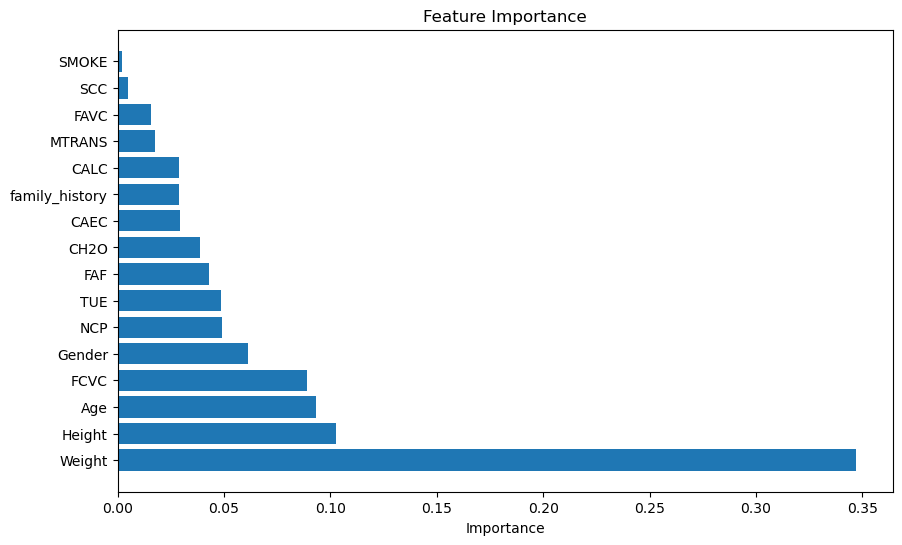

In [154]:
# Create a DataFrame with features and their importance
feature_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()